In [2]:
import numpy as np  # Importing the numpy library for numerical computations.
import pandas as pd  # Importing pandas for data manipulation and analysis.

In [3]:
# Reading the Iris dataset CSV file into a pandas DataFrame.

df=pd.read_csv("C:/Users/soham/OneDrive/Documents/Immersivify/Task 1/Iris flower dataset/IRIS.csv")

In [4]:
# Displaying the first five rows of the DataFrame to understand the data structure.

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder  # Importing LabelEncoder for encoding categorical labels.
le = LabelEncoder()  # Creating an instance of LabelEncoder.


In [6]:
# Encoding the 'species' column to convert string labels into numerical values.

df.species = le.fit_transform(df.species)

In [7]:
# Displaying the updated DataFrame to check the encoded 'species' column.

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization.
import seaborn as sns  # Importing Seaborn for advanced visualization.


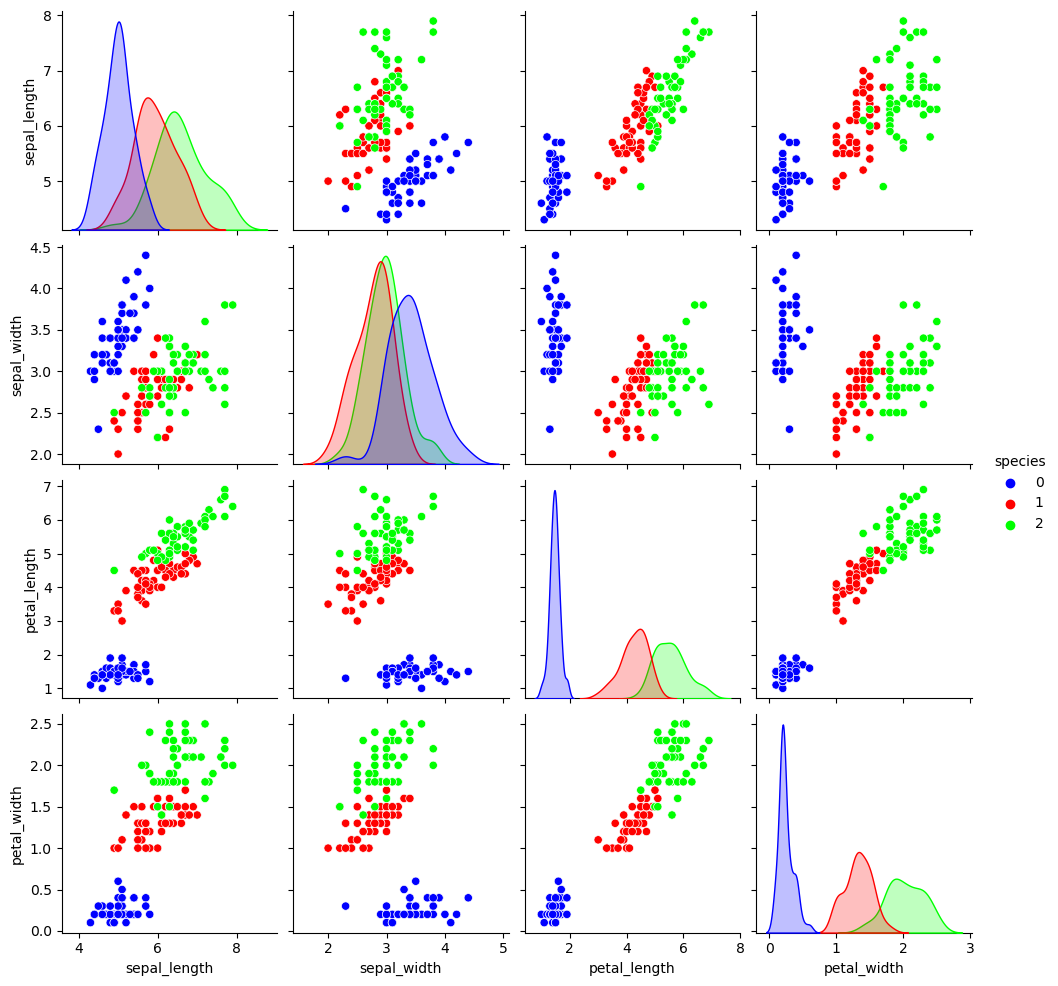

In [9]:
# Creating a pairplot to visualize relationships between features, colored by species.
sns.pairplot(df, hue='species',palette="brg")
plt.show()  # Displaying the plot.


## When we observe the 3 different colored data points,we can understand that they are well separated even though some points are overlapped. Hence,it is possible to divide them using a classification Machine Learning model like SVM

In [30]:
# Separating the features (x) and target variable (y).
x = df.drop(['species'], axis=1)  # Dropping the 'species' column from features.
y = df.species  # Assigning the 'species' column as the target.


In [31]:
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting data.

# Splitting the data into training and testing sets (70% train, 30% test).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [33]:
from sklearn.svm import SVC  # Importing Support Vector Classifier (SVC) from sklearn.
model = SVC()  # Creating an instance of the SVC model.

# Training the SVC model on the training data.
model.fit(x_train, y_train)

# Calculating and printing the model's accuracy on the test set.
svc_test_score = model.score(x_test, y_test)
print("svc test score:", svc_test_score)

# Calculating and printing the model's accuracy on the training set.
svc_train_score = model.score(x_train, y_train)
print("svc train score:", svc_train_score)


svc test score: 0.9777777777777777
svc train score: 0.9714285714285714


In [40]:
# Making a prediction for a sample in the dataset.

model.predict([x.iloc[149].values])  # Extracts the row as a NumPy array and wraps it in a list for predict()


C:\Users\soham\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

## The output is 2.
## This means the flower is Virginica which means oue model is predicting correctly.

In [42]:
# Making a prediction for a custom sample with given feature values.
model.predict([[7.7,2.6,6.9,2.3]])


C:\Users\soham\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

# Let us try different models and compare their scores with SVC to see whether they are better 


In [16]:
from sklearn.linear_model import LinearRegression  # Importing Linear Regression from sklearn.
from sklearn.metrics import r2_score  # Importing r2_score for regression evaluation.

reg = LinearRegression()  # Creating an instance of the Linear Regression model.


In [44]:
# Training the Linear Regression model on the training data.
reg.fit(x_train, y_train)

# Predicting the target variable for the test data.
y_pred = reg.predict(x_test)

y_pred  # Displaying the predicted values.

# Calculating and printing the R-squared score for the test predictions.
R2_score = r2_score(y_test, y_pred)
print("r2 score:", R2_score)

# Calculating and printing the model's score on the test data.
linear_test_score = reg.score(x_test, y_test)
print("linear_test_score:", linear_test_score)

# Calculating and printing the model's score on the training data.
linear_train_score = reg.score(x_train, y_train)
print("linear_train_score:", linear_train_score)


r2 score: 0.9301323822718722
linear_test_score: 0.9301323822718722
linear_train_score: 0.9286213370178295


r2 score: 0.9093670164706169
linear_test_score: 0.9093670164706169
linear_train_score: 0.9372999292328044


In [56]:
from sklearn.preprocessing import PolynomialFeatures  # Importing PolynomialFeatures for polynomial regression.
pf = PolynomialFeatures(degree=2)  # Creating an instance of PolynomialFeatures with degree 2.

# Transforming the test and train feature data to include polynomial features.
x1 = pf.fit_transform(x_test)
x2 = pf.fit_transform(x_train)

plr = LinearRegression()  # Creating an instance of the Linear Regression model for polynomial regression.

# Training the polynomial regression model on the transformed test data.
plr.fit(x1, y_test)

# Predicting the target variable for the transformed test data.
y_pred1 = plr.predict(x1)

y_pred1  # Displaying the predicted values.

# Calculating and printing the polynomial regression model's score on the test data.
plr_test_score = plr.score(x1, y_test)
print("plr test score :", plr_test_score)

# Calculating and printing the polynomial regression model's score on the training data.
plr_train_score = plr.score(x2, y_train)
print("plr train score :", plr_train_score)


plr test score : 0.9728929195380441
plr train score : 0.9253579390954122


In [46]:
# Creating a table to compare the scores and deviations between test and train scores.
comparison_data = {
    'Model': ['SVC', 'Linear Regression', 'Polynomial Regression'],
    'Train Score': [svc_train_score, linear_train_score, plr_train_score],
    'Test Score': [svc_test_score, linear_test_score, plr_test_score],
    'Deviation (Train-Test)': [
        svc_train_score - svc_test_score,
        linear_train_score - linear_test_score,
        plr_train_score - plr_test_score
    ]
}

# Creating a DataFrame for the comparison table.
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)


                   Model  Train Score  Test Score  Deviation (Train-Test)
0                    SVC     0.971429    0.977778               -0.006349
1      Linear Regression     0.928621    0.930132               -0.001511
2  Polynomial Regression     0.925358    0.972893               -0.047535


### Conclusion

1.The SVC model has very high scores for both training and testing sets, with a negligible deviation between the two scores.
This indicates:
a.The model generalizes well to unseen data.
b.It is neither overfitting nor underfitting the data.

2.The Linear Regression model also shows strong performance on both training and testing sets, with a very small deviation. This suggests:
a.The model is slightly less accurate compared to the SVC model but still performs consistently well.
b. It effectively captures linear relationships in the data and generalizes without overfitting.

3.The Polynomial Regression model shows a relatively larger deviation between training and testing scores, with the test score being significantly higher than the train score.
This could indicate:
a.The model might have benefited from additional features introduced by the polynomial transformation, leading to better performance on the test set.
b.A possible slight underfitting during training, as the training score is lower compared to its test score.

### Overall Observations

SVC appears to be the most reliable model with balanced and high accuracy on both training and testing sets.
Linear Regression is close to SVC in performance but might not handle non-linear relationships as effectively.
Polynomial Regression performs well on the test set but shows a deviation suggesting room for tuning or improvement in training.
